# Parameter tuning

In [ ]:
#code adapted from https://github.com/thomasjpfan/ml-workshop-intermediate-1-of-2

In [1]:
import seaborn as sns
sns.set_theme(context="notebook", font_scale=1.4,
              rc={"figure.figsize": [10, 6]})

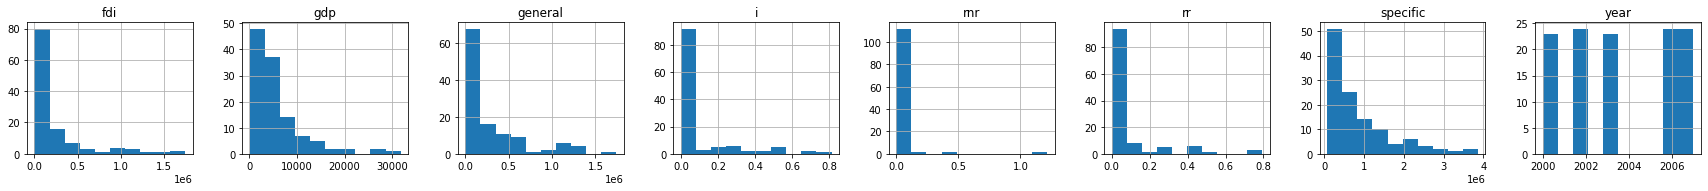

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/davidrkearney/Kearney_Data_Science/master/_notebooks/df_panel_fix.csv'
df = pd.read_csv(url, error_bad_lines=False)
df

import pandas as pd
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

df=df.dropna()

df.isnull().sum()

df.columns

sklearn.set_config(display='diagram')

X, y = df.drop(['it', 'Unnamed: 0'], axis = 1), df['it']


X = X.select_dtypes(include='number')
X



_ = X.hist(figsize=(30, 15), layout=(5, 8))

In [5]:
X.fdi

4        31847
6        38375
7        36720
10      139354
11      299892
        ...   
347      39453
354     307610
355     498055
358     888935
359    1036576
Name: fdi, Length: 118, dtype: int64

In [7]:
import matplotlib.pyplot as plt

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [10]:
params = {
    'max_depth': [2, 4, 8, 12, 16],
    'max_features': [4, 8, 16, 32]
}

In [18]:
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42), param_grid=params,
    verbose=1,
    n_jobs=8)  # Update to the number of physical cpu cores

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    3.6s finished


GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=8,
             param_grid={'max_depth': [2, 4, 8, 12, 16],
                         'max_features': [4, 8, 16, 32]},
             verbose=1)

In [21]:
grid_search.best_score_

0.6771979740200512

In [22]:
grid_search.best_params_

{'max_depth': 12, 'max_features': 4}

In [23]:
grid_search.score(X_test, y_test)

0.7816726342611063

In [24]:
import pandas as pd
cv_df = pd.DataFrame(grid_search.cv_results_)

In [25]:
res = (cv_df.pivot(index='param_max_depth', columns='param_max_features', values='mean_test_score')
            .rename_axis(index='max_depth', columns='max_features'))

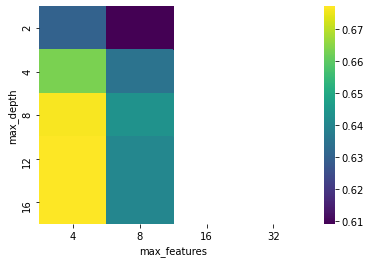

In [28]:
import seaborn as sns
_ = sns.heatmap(res, cmap='viridis')

In [31]:
# %load solutions/02-ex01-solutions.py

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    "max_features": randint(1, 11),
    "min_samples_split": randint(2, 11)
}

random_search = RandomizedSearchCV(RandomForestRegressor(random_state=0),
                                   param_distributions=param_dist,
                                   verbose=1,
                                   random_state=0)

random_search.fit(X_train, y_train)

random_search.best_params_

random_search.best_score_

random_search.score(X_test, y_test)

from sklearn.svm import SVC

svm_grid = GridSearchCV(
    SVC(random_state=42), param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
    verbose=1, n_jobs=8
)

svm_grid.fit(X_train, y_train)

svm_grid.best_score_

svm_grid.best_params_

svm_grid.score(X_test, y_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/david/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/david/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/david/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/home/david/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/david/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/home/david/anaconda3/lib/

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    4.7s finished


ValueError: n_splits=5 cannot be greater than the number of members in each class.